# Image Classification using OpenCV and GoogleNet (pre-trained on ImageNet) 

In [1]:
# import the necessary packages
%matplotlib inline
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['figure.figsize'] = (14,6)

In [2]:
# load the input image from disk
image = cv2.imread("images/traffic_light.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# load the class labels from disk
rows = open('class/labelData.txt').read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

In [4]:
# our CNN requires fixed spatial dimensions for our input image(s)
# so we need to ensure it is resized to 224x224 pixels while
# performing mean subtraction (104, 117, 123) to normalize the input;
# after executing this command our "blob" now has the shape:
# (1, 3, 224, 224)
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))

In [5]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('model/bvlc_googlenet.prototxt', 'model/bvlc_googlenet.caffemodel')

[INFO] loading model...


In [6]:
# set the blob as input to the network and perform a forward-pass to
# obtain our output classification
net.setInput(blob)
start = time.time()
preds = net.forward()
end = time.time()
print("[INFO] classification took {:.5} seconds".format(end - start))

[INFO] classification took 0.092508 seconds


In [7]:
# sort the indexes of the probabilities in descending order (higher
# probabilitiy first) and grab the top-5 predictions
idxs = np.argsort(preds[0])[::-1][:5]

[INFO] 1. label: traffic light, probability: 1.0
[INFO] 2. label: pole, probability: 9.3483e-10
[INFO] 3. label: street sign, probability: 8.1576e-11
[INFO] 4. label: spotlight, probability: 1.9844e-12
[INFO] 5. label: cinema, probability: 6.4207e-13


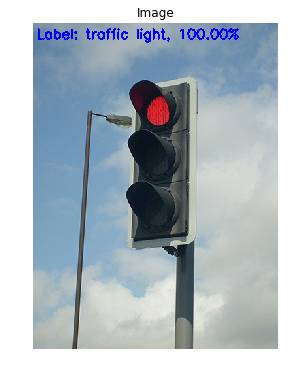

In [8]:
# loop over the top-5 predictions and display them
for (i, idx) in enumerate(idxs):
    # draw the top prediction on the input image
    if i == 0:
        text = "Label: {}, {:.2f}%".format(classes[idx],
            preds[0][idx] * 100)
        cv2.putText(image, text, (5, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 0, 255), 2)
 
    # display the predicted label + associated probability to the
    # console	
    print("[INFO] {}. label: {}, probability: {:.5}".format(i + 1,
        classes[idx], preds[0][idx]))
 
# display the output image
plt.title('Image'),plt.axis("Off")
plt.imshow(image)